In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
import spotipy.util as util

from skimage import io
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_csv('datasets/SpotifyFeatures.csv')
df


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


In [3]:
# at this point ask the user, to choose their interest of categorical values


In [4]:
spotify_features_df = df
genre_OHE = pd.get_dummies(spotify_features_df.genre)
key_OHE = pd.get_dummies(spotify_features_df.key)

In [5]:
scaled_features = MinMaxScaler().fit_transform([
  spotify_features_df['acousticness'].values,
  spotify_features_df['danceability'].values,
  spotify_features_df['duration_ms'].values,
  spotify_features_df['energy'].values,
  spotify_features_df['instrumentalness'].values,
  spotify_features_df['liveness'].values,
  spotify_features_df['loudness'].values,
  spotify_features_df['speechiness'].values,
  spotify_features_df['tempo'].values,
  spotify_features_df['valence'].values,
  ])

spotify_features_df[['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']] = scaled_features.T

In [6]:
spotify_features_df = spotify_features_df.drop('genre',axis = 1)
spotify_features_df = spotify_features_df.drop('artist_name', axis = 1)
spotify_features_df = spotify_features_df.drop('track_name', axis = 1)
spotify_features_df = spotify_features_df.drop('popularity',axis = 1)
spotify_features_df = spotify_features_df.drop('key', axis = 1)
spotify_features_df = spotify_features_df.drop('mode', axis = 1)
spotify_features_df = spotify_features_df.drop('time_signature', axis = 1)

spotify_features_df = spotify_features_df.join(genre_OHE)
spotify_features_df = spotify_features_df.join(key_OHE)

In [7]:
spotify_features_df

,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,B,C,C#,D,D#,E,F,F#,G,G#
0,0BRjO6ga9RKCKjfDqeFgWV,0.000025,0.000022,1.0,0.000028,0.000018,0.000022,0.0,0.000019,0.001699,...,0,0,1,0,0,0,0,0,0,0
1,0BjC1NfoEOOusryehmNudP,0.000042,0.000045,1.0,0.000046,0.000040,0.000042,0.0,0.000041,0.001307,...,0,0,0,0,0,0,0,1,0,0
2,0CoSDzoNIKCRs124s9uTVy,0.000087,0.000085,1.0,0.000082,0.000082,0.000082,0.0,0.000082,0.000666,...,0,1,0,0,0,0,0,0,0,0
3,0Gc6TVm52BwZD07Ki6tIvf,0.000084,0.000081,1.0,0.000082,0.000080,0.000081,0.0,0.000080,0.001207,...,0,0,1,0,0,0,0,0,0,0
4,0IuslXpMROHdEPvSl1fTQK,0.000267,0.000260,1.0,0.000259,0.000257,0.000258,0.0,0.000256,0.001957,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,2XGLdVl7lGeq8ksM6Al7jT,0.000033,0.000035,1.0,0.000035,0.000034,0.000033,0.0,0.000033,0.000387,...,0,0,0,1,0,0,0,0,0,0
232721,1qWZdkBl4UVPj9lK6HuuFM,0.000025,0.000027,1.0,0.000027,0.000025,0.000025,0.0,0.000025,0.000428,...,0,0,0,0,0,1,0,0,0,0
232722,2ziWXUmQLrXTiYjCg2fZ2t,0.000055,0.000053,1.0,0.000052,0.000050,0.000050,0.0,0.000050,0.000554,...,0,0,0,1,0,0,0,0,0,0
232723,6EFsue2YbIG4Qkq8Zr9Rir,0.000033,0.000035,1.0,0.000035,0.000032,0.000034,0.0,0.000033,0.000482,...,0,0,0,0,0,0,0,0,0,0


In [8]:
client_id = #client_id
client_secret= #client_secret

In [43]:
scope = 'user-library-read'
token = util.prompt_for_user_token(
    scope, 
    client_id= client_id, 
    client_secret=client_secret, 
    redirect_uri='http://localhost:5000/callback'
  )
sp = spotipy.Spotify(auth=token)
playlist_dic = {}
playlist_cover_art = {}

for i in sp.current_user_playlists()['items']:
    playlist_dic[i['name']] = i['uri'].split(':')[2]
    playlist_cover_art[i['uri'].split(':')[2]] = i['images'][0]['url']

print(playlist_dic)

{'ImaginaryHappyPlace': '2e7imPENeSrSJvvJAi6EkS', 'Drillin': '1L1K3qFxiyM33p2vhwBVbX', 'Good BTown songs still exist': '65MTc21E0ZC9Vou4pFoXUZ'}


In [53]:
def generate_playlist_df(playlist_name, playlist_dic, spotify_data):
    
    playlist = pd.DataFrame()

    for i, j in enumerate(sp.playlist(playlist_dic[playlist_name])['tracks']['items']):
        playlist.loc[i, 'artist'] = j['track']['artists'][0]['name']
        playlist.loc[i, 'track_name'] = j['track']['name']
        playlist.loc[i, 'track_id'] = j['track']['id']
        playlist.loc[i, 'url'] = j['track']['album']['images'][1]['url']
        playlist.loc[i, 'date_added'] = j['added_at']

    playlist['date_added'] = pd.to_datetime(playlist['date_added'])  
    
    playlist = playlist[playlist['track_id'].isin(spotify_data['track_id'].values)].sort_values('date_added',ascending = False)

    return playlist
playlist_df = generate_playlist_df('Drillin', playlist_dic, df) 

In [54]:
playlist_df

,artist,track_name,track_id,url,date_added
55,Flo Rida,Low (feat. T-Pain),0CAfXk7DXMnon4gLudAp7J,https://i.scdn.co/image/ab67616d00001e02f9bd7a...,2021-09-23 05:59:52+00:00
54,BTS,Outro: Tear,5p10VwQ8LRoyTc8LFrvPw6,https://i.scdn.co/image/ab67616d00001e0221108e...,2021-09-19 06:03:47+00:00
50,Block B,Nillili Mambo,4fZYGHiRcKxwVSnF498uaE,https://i.scdn.co/image/ab67616d00001e02a22e31...,2021-07-28 15:25:15+00:00
47,MARINA,Bubblegum Bitch,0ZFBKLOZLIM16RAUb5eomN,https://i.scdn.co/image/ab67616d00001e0272513f...,2021-05-03 16:01:24+00:00
32,Stefflon Don,16 Shots,2169IKAivSUUFGcedGASXc,https://i.scdn.co/image/ab67616d00001e0234bafd...,2021-03-04 17:38:05+00:00
16,BTS,MIC Drop,2SYa5Lx1uoCvyDIW4oee9b,https://i.scdn.co/image/ab67616d00001e02f9a16d...,2020-11-25 14:19:01+00:00
14,BTS,Burning Up (Fire),4z9gBZQjGS4QLb4LOvmeuA,https://i.scdn.co/image/ab67616d00001e02ad7586...,2020-11-25 14:18:39+00:00
13,BTS,Not Today,4hrpoqJMVE7FxBu1YWx0eQ,https://i.scdn.co/image/ab67616d00001e02bd375b...,2020-11-25 14:18:31+00:00
9,The Weeknd,Starboy,7MXVkk9YMctZqd1Srtv4MB,https://i.scdn.co/image/ab67616d00001e024718e2...,2020-11-25 14:17:25+00:00
0,Daddy Yankee,"Gasolina (with Pitbull, Lil Jon, Noriega, Dj B...",2TXMsGsDbTBPTqwCoKzMl7,https://i.scdn.co/image/ab67616d00001e02394013...,2020-11-07 14:25:30+00:00


In [55]:
from skimage import io
import matplotlib.pyplot as plt

def visualize_cover_art(playlist_df):
    temp = playlist_df['url'].values
    plt.figure(figsize=(15,int(0.625 * len(temp))) , facecolor='#8cfc03')
    columns = 5
    
    for i, url in enumerate(temp):
        plt.subplot(len(temp) / columns + 1, columns, i + 1)

        image = io.imread(url)
        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])
        s='' 
        plt.xlabel(s.join(playlist_df['track_name'].values[i].split(' ')[:4]), fontsize = 10, fontweight='bold')
        plt.tight_layout(h_pad=0.8, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)

    plt.show()

<ipython-input-55-dcd6309dc7e4>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(temp) / columns + 1, columns, i + 1)


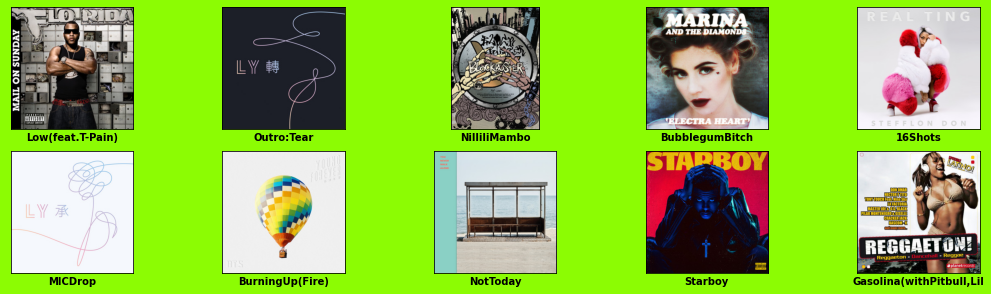

In [56]:
visualize_cover_art(playlist_df)

In [57]:
def generate_playlist_vector(spotify_features, playlist_df, weight_factor):
    
    spotify_features_playlist = spotify_features[spotify_features['track_id'].isin(playlist_df['track_id'].values)]
    spotify_features_playlist = spotify_features_playlist.merge(playlist_df[['track_id','date_added']], on = 'track_id', how = 'inner')
    
    spotify_features_nonplaylist = spotify_features[~spotify_features['track_id'].isin(playlist_df['track_id'].values)]
    
    playlist_feature_set = spotify_features_playlist.sort_values('date_added',ascending=False)
    
    
    most_recent_date = playlist_feature_set.iloc[0,-1]
    
    for ix, row in playlist_feature_set.iterrows():
        playlist_feature_set.loc[ix,'days_from_recent'] = int((most_recent_date.to_pydatetime() - row.iloc[-1].to_pydatetime()).days)
        
    
    playlist_feature_set['weight'] = playlist_feature_set['days_from_recent'].apply(lambda x: weight_factor ** (-x))
    
    playlist_feature_set_weighted = playlist_feature_set.copy()
    
    playlist_feature_set_weighted.update(playlist_feature_set_weighted.iloc[:,:-3].mul(playlist_feature_set_weighted.weight.astype(int),0))   
    
    playlist_feature_set_weighted_final = playlist_feature_set_weighted.iloc[:, :-3]
    

    
    return playlist_feature_set_weighted_final.sum(axis = 0), spotify_features_nonplaylist


In [58]:
playlist_vector, nonplaylist_df = generate_playlist_vector(spotify_features_df, playlist_df, 1.2)
print(playlist_vector.shape)
print(nonplaylist_df.head())

(50,)
                 track_id  acousticness  danceability  duration_ms    energy  \
0  0BRjO6ga9RKCKjfDqeFgWV      0.000025      0.000022          1.0  0.000028   
1  0BjC1NfoEOOusryehmNudP      0.000042      0.000045          1.0  0.000046   
2  0CoSDzoNIKCRs124s9uTVy      0.000087      0.000085          1.0  0.000082   
3  0Gc6TVm52BwZD07Ki6tIvf      0.000084      0.000081          1.0  0.000082   
4  0IuslXpMROHdEPvSl1fTQK      0.000267      0.000260          1.0  0.000259   

   instrumentalness  liveness  loudness  speechiness     tempo  ...  B  C  C#  \
0          0.000018  0.000022       0.0     0.000019  0.001699  ...  0  0   1   
1          0.000040  0.000042       0.0     0.000041  0.001307  ...  0  0   0   
2          0.000082  0.000082       0.0     0.000082  0.000666  ...  0  1   0   
3          0.000080  0.000081       0.0     0.000080  0.001207  ...  0  0   1   
4          0.000257  0.000258       0.0     0.000256  0.001957  ...  0  0   0   

   D  D#  E  F  F#  G  G# 

In [59]:
def generate_recommendation(spotify_data, playlist_vector, nonplaylist_df):

    non_playlist = spotify_data[spotify_data['track_id'].isin(nonplaylist_df['track_id'].values)]
    non_playlist['sim'] = cosine_similarity(nonplaylist_df.drop(['track_id'], axis = 1).values, playlist_vector.drop(labels = 'track_id').values.reshape(1, -1))[:,0]
    non_playlist_top15 = non_playlist.sort_values('sim',ascending = False).head(15)
    non_playlist_top15['url'] = non_playlist_top15['track_id'].apply(lambda x: sp.track(x)['album']['images'][1]['url'])
    
    return  non_playlist_top15

In [60]:
top15 = generate_recommendation(df, playlist_vector, nonplaylist_df)  
top15.head()

<ipython-input-59-d9d2733e0d7e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_playlist['sim'] = cosine_similarity(nonplaylist_df.drop(['track_id'], axis = 1).values, playlist_vector.drop(labels = 'track_id').values.reshape(1, -1))[:,0]


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,sim,url
122079,Rap,G-Eazy,Bone Marrow,4XnjPTtMivM4TQc1Y167ao,50,0.000033,0.000036,1.0,0.000036,0.000033,A#,0.000034,0.0,Minor,0.000034,0.000771,4/4,0.000036,0.866025,https://i.scdn.co/image/ab67616d00001e0215b7b6...
150070,Pop,Sixpence None The Richer,There She Goes,43z6scIZU2QcEieMQFAJRG,65,0.000035,0.000038,1.0,0.000040,0.000035,A#,0.000035,0.0,Major,0.000035,0.000766,4/4,0.000038,0.866025,https://i.scdn.co/image/ab67616d00001e02b18281...
68107,Hip-Hop,Pressa,420 in London,1zDwQIp3BgbH9dSmYtPBDH,65,0.000032,0.000036,1.0,0.000035,0.000032,A#,0.000032,0.0,Minor,0.000034,0.000762,4/4,0.000034,0.866025,https://i.scdn.co/image/ab67616d00001e027f5db6...
118613,Rap,The Notorious B.I.G.,The What,4dTtYVQzlwBMpVyQ4h3wy2,58,0.000035,0.000037,1.0,0.000038,0.000035,A#,0.000035,0.0,Major,0.000036,0.000765,4/4,0.000038,0.866025,https://i.scdn.co/image/ab67616d00001e02db0995...
70622,Hip-Hop,The Notorious B.I.G.,The What,4dTtYVQzlwBMpVyQ4h3wy2,58,0.000035,0.000037,1.0,0.000038,0.000035,A#,0.000035,0.0,Major,0.000036,0.000765,4/4,0.000038,0.866025,https://i.scdn.co/image/ab67616d00001e02db0995...


<ipython-input-55-dcd6309dc7e4>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(temp) / columns + 1, columns, i + 1)


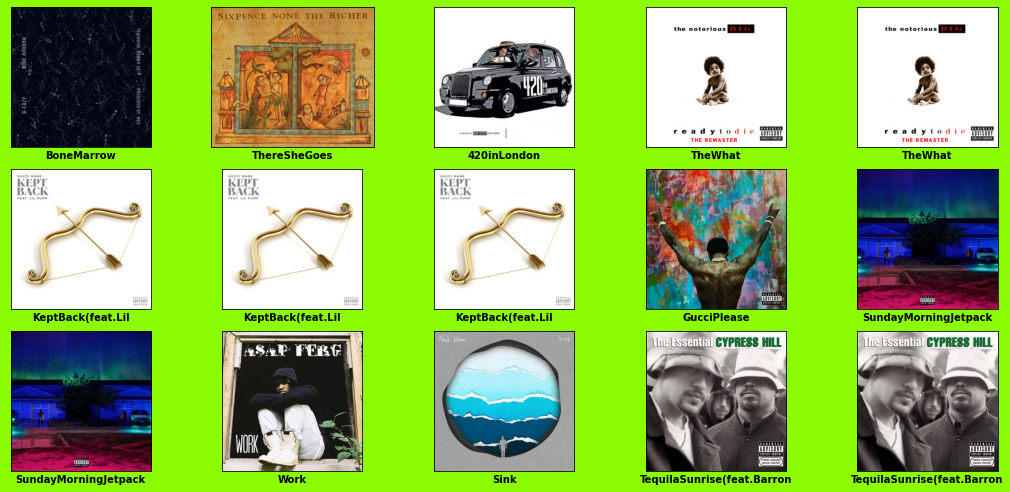

In [61]:
visualize_cover_art(top15)